In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('review_normalized.csv')
df.head()

,id,name,description,review,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,...,sleep_quality,rooms,check_in_front_desk,business_service,ratings,normalized_review,normalized_description,normalized_name,target,sentiment
0,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,We had a whisper-quiet queen deluxe room couty...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,whisper quiet queen deluxe room coutyard room ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
1,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,Great 3 night stay right after Thanksgiving. A...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,great night stay right thanksgiving agree prev...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
2,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,I hesitate to give this little gem a stellar r...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,hesitate give little gem stellar review fear a...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
3,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,You won't find a more conveniently located hot...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,find conveniently locate hotel nyc pace count ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
4,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,This small boutique hotel right off Times Squa...,4.0,50,very expensive,130.96,5,1,...,4.0,4.0,4.0,4.0,5.0,small boutique hotel right time square perfect...,experience magic time square step door escape ...,casablanca hotel time square,1,positive


In [3]:
df_copy = pd.DataFrame(df) #store a copy of the dataframe just in case

# Drop unnecssary columns:
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,ratings,sentiment
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,positive


# Step 1: Check null

In [4]:
df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

In [5]:
df = df.dropna()

# re-check if all nulls are removed:

df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

# Step 2: Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hotel_class          239166 non-null  float64
 1   no_of_amenities      239166 non-null  int64  
 2   price_level          239166 non-null  object 
 3   dist_to_metro        239166 non-null  float64
 4   no_of_attractions    239166 non-null  int64  
 5   award                239166 non-null  int64  
 6   no_of_reviews        239166 non-null  int64  
 7   service              239166 non-null  float64
 8   cleanliness          239166 non-null  float64
 9   value                239166 non-null  float64
 10  location             239166 non-null  float64
 11  sleep_quality        239166 non-null  float64
 12  rooms                239166 non-null  float64
 13  check_in_front_desk  239166 non-null  float64
 14  business_service     239166 non-null  float64
 15  ratings          

**Comments**:

- Categorical variable: price_level (nominal), sentiment (binary) (**hotel_class**: there are values from 0, 1, 1.5, ... 4.5 - weird! supposed to be categorical, but we will treat this as numerical due to this reason.)
- Numerical varibles: rest

## Change our target variable 'ratings' to Positive (1) if ratings >= 4 / Negative (0) if 0 <= ratings <= 3

In [7]:
# Re-arrange: Move our target variable 'ratings' to the last column:

# Get all columns except 'ratings'
columns = [col for col in df.columns if col != 'ratings']

# Reorder the DataFrame with 'ratings' as the last column
df = df[columns + ['ratings']]

# Now 'ratings' is the last column in df
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,5.0


In [8]:
df['ratings'].value_counts()

ratings
5.0    101589
4.0     76777
3.0     31063
2.0     15680
1.0     14057
Name: count, dtype: int64

In [9]:
# 'ratings': 0 = negative, 1 = positive

df['ratings_binary'] = df['ratings'].apply(lambda val: 1 if val >= 4 else 0)

df = df.drop(['ratings'], axis = 1)

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings_binary
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,1


## Correlation heatmap (numerical variables)

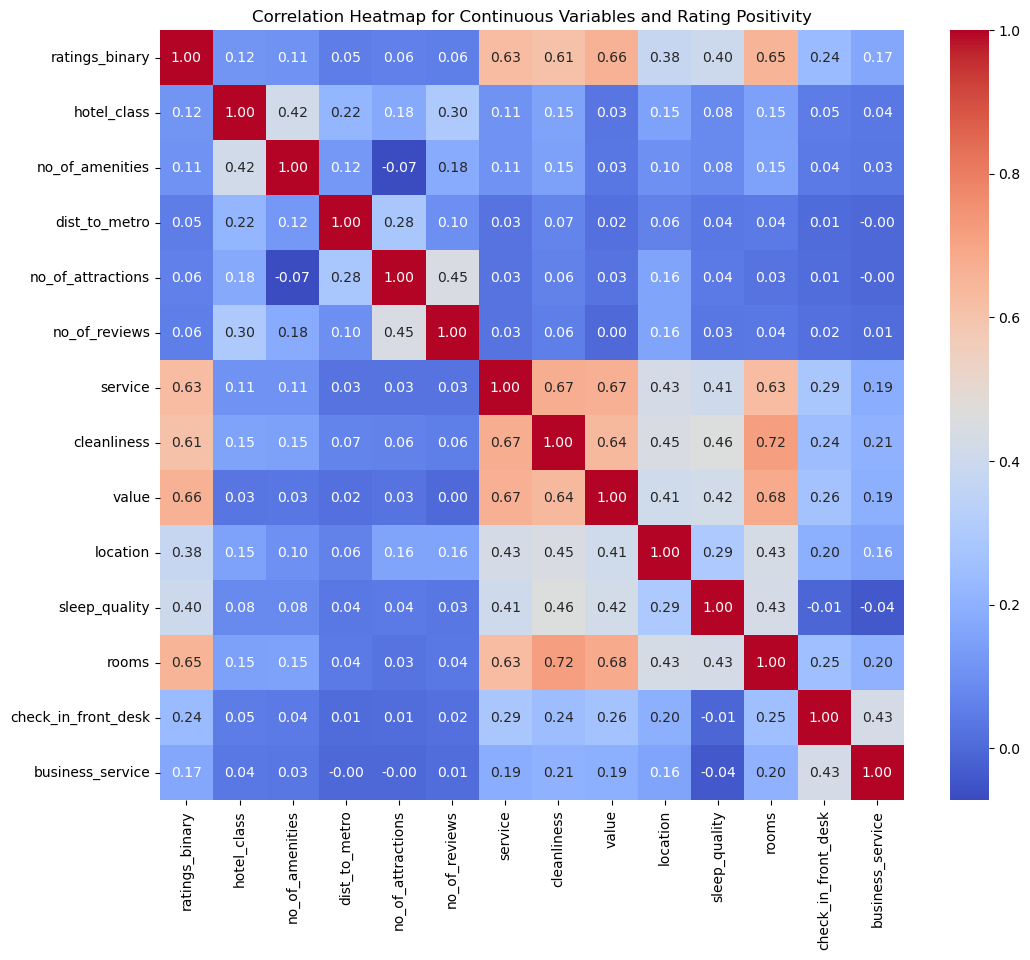

In [10]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + continuous_cols].corr()

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Variables and Rating Positivity')
plt.show()

# Step 3: Feature engineering

## 3.1. Categorical variables: One-hot coding

- **Binary categorical variable ('sentiment')**

In [11]:
# 'Sentiment': 0 = negative, 1 = positive

df['sentiment'] = df['sentiment'].apply(lambda val: 1 if val == 'positive' else 0)

- **Nominal categorical variable ('price_level')**

In [12]:
df['price_level'].value_counts()

price_level
very expensive    120682
expensive          59009
moderate           46362
low                10287
Not Specified       2826
Name: count, dtype: int64

In [13]:
# Create a one-hot encoded set of the 'price_level' values, using pd.get_dummies() & Convert boolean columns to integer (0/1):
price_level_set = pd.get_dummies(df['price_level'], prefix = 'price_level').astype(int)

# Concatenate this set back to the dataFrame
df = pd.concat([df, price_level_set], axis=1)

# Let's now have a look:
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,...,rooms,check_in_front_desk,business_service,sentiment,ratings_binary,price_level_Not Specified,price_level_expensive,price_level_low,price_level_moderate,price_level_very expensive
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,5.0,4.0,4.0,1,1,0,0,0,0,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,...,4.0,4.0,4.0,1,1,0,0,0,0,1


In [14]:
# Now, we no longer need 'Property_Area' column after encoding it. Hence, we will drop this column:

df = df.drop(['price_level'], axis = 1)

## 3.2. Numerical variables: Standardize

We'll investigate the variance of columns having numerical variables in the dataset to determine which features should be standardized.

In [15]:
# Step 1: Identify all numeric columns
#numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
#continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Step 3: Calculate variance for only the continuous columns
variance = df[continuous_cols].var()

print(variance)

hotel_class            9.154227e-01
no_of_amenities        5.170557e+02
dist_to_metro          4.473735e+04
no_of_attractions      2.559658e+00
no_of_reviews          1.251214e+07
service                1.293059e+00
cleanliness            1.030005e+00
value                  1.226482e+00
location               6.614198e-01
sleep_quality          8.633781e-01
rooms                  1.055495e+00
check_in_front_desk    1.804572e-01
business_service       1.329029e-01
dtype: float64


In [16]:
# Calculate skewness for these columns
skewed_features = df[continuous_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Continuous Numeric Features:")
print(skewed_features)


Skewness of Continuous Numeric Features:
no_of_reviews          1.567536
no_of_amenities        0.640266
no_of_attractions      0.589653
dist_to_metro          0.514933
value                 -1.037590
rooms                 -1.165960
service               -1.468825
hotel_class           -1.617172
cleanliness           -1.704974
location              -2.150575
sleep_quality         -2.156172
check_in_front_desk   -3.154459
business_service      -4.543579
dtype: float64


In [17]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize based on high variance and skewness
columns_to_standardize = ['no_of_reviews', 'no_of_amenities', 'dist_to_metro', 
                          'no_of_attractions']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
print(df[columns_to_standardize].head())

   no_of_reviews  no_of_amenities  dist_to_metro  no_of_attractions
0       1.085053        -0.401305       -0.62376           1.829899
1       1.085053        -0.401305       -0.62376           1.829899
2       1.085053        -0.401305       -0.62376           1.829899
3       1.085053        -0.401305       -0.62376           1.829899
4       1.085053        -0.401305       -0.62376           1.829899


In [18]:
# Re-check variance:

print(df[continuous_cols].var())

hotel_class            0.915423
no_of_amenities        1.000004
dist_to_metro          1.000004
no_of_attractions      1.000004
no_of_reviews          1.000004
service                1.293059
cleanliness            1.030005
value                  1.226482
location               0.661420
sleep_quality          0.863378
rooms                  1.055495
check_in_front_desk    0.180457
business_service       0.132903
dtype: float64


# Distribution of Target variable

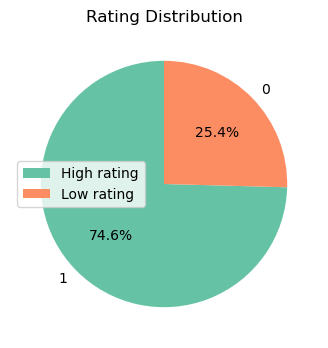

In [19]:
# First, check class distribution:

# Distribution of Target Variable ('ratings_binary')
plt.figure(figsize=(6, 4))
df['ratings_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Rating Distribution')
plt.legend(labels=['High rating', 'Low rating'])
plt.ylabel('')  # Hides the y-label
plt.show()

**Comment: Target variable is extremely imbalanced. Our goal is to predict the minority class (customers with negative overal ratings).**

# Data Modelling (Rebalanced):

Here we will use all classification models:

- Logistic Regression
- Decision Tree
- Random Forest
- Näive Bayes
- Ensemble methods: Bagging, Boosting (AdaBoost, XGBoost)


**Why These Models Are Selected:**
- Logistic Regression: A simple baseline model for binary classification, offering interpretability.
- Decision Tree: Provides a non-linear decision-making process and is easy to visualize.
- Random Forest: An ensemble method that reduces overfitting, improves accuracy, and handles feature importance.
- Naive Bayes: Suitable for classification with categorical features and is efficient with a large dataset.
- Ensemble Methods (Bagging, Boosting):
    - Bagging: Helps in reducing variance (e.g., Random Forest).
    - Boosting: Focuses on reducing bias, with AdaBoost and XGBoost being powerful boosting algorithms for improving accuracy.

In [20]:
# Define feature variables (use all columns except 'ratings_binary') and target variable:
X = df.drop(columns=['ratings_binary'])
y = df['ratings_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify = y)

/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-p

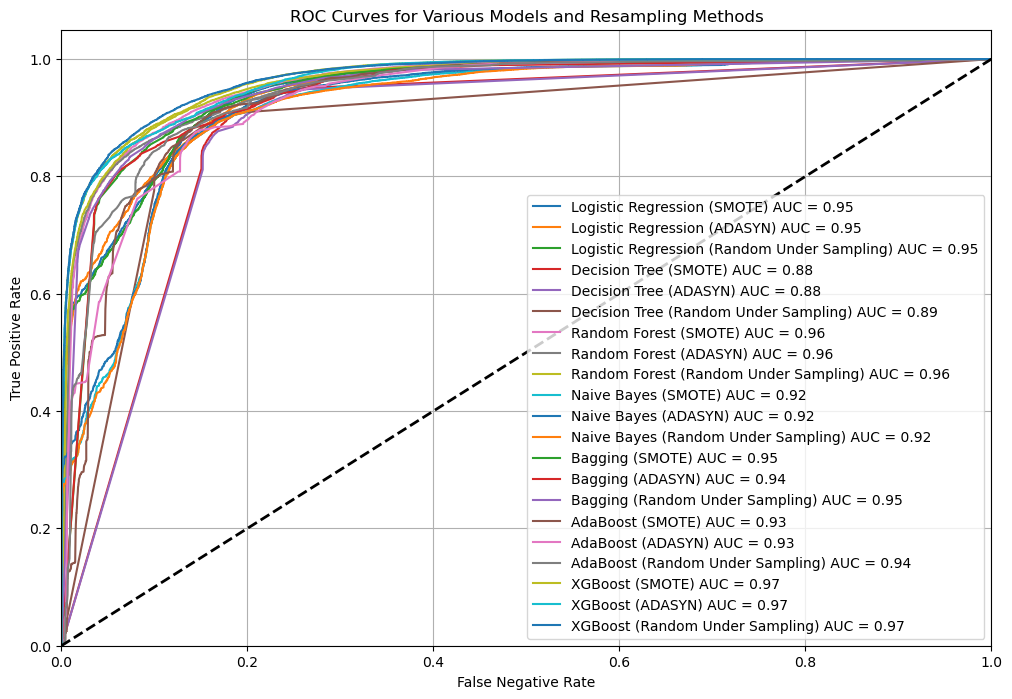


Classification Report for Logistic Regression (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.73      0.85      0.79     12160
 High rating       0.94      0.90      0.92     35674

    accuracy                           0.88     47834
   macro avg       0.84      0.87      0.85     47834
weighted avg       0.89      0.88      0.89     47834


Classification Report for Logistic Regression (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.65      0.88      0.75     12160
 High rating       0.95      0.84      0.89     35674

    accuracy                           0.85     47834
   macro avg       0.80      0.86      0.82     47834
weighted avg       0.88      0.85      0.86     47834


Classification Report for Logistic Regression (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.73      0.85      0.79     12160
 High rating       0.95      0.89    

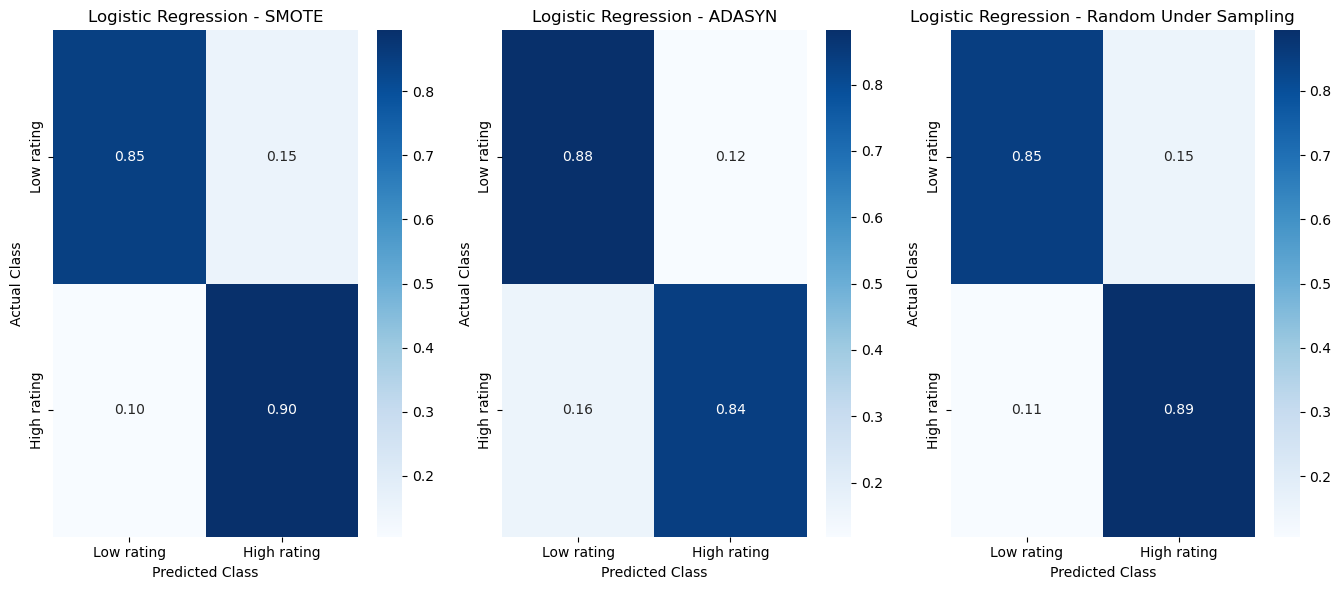


Classification Report for Decision Tree (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.75      0.81      0.78     12160
 High rating       0.93      0.91      0.92     35674

    accuracy                           0.88     47834
   macro avg       0.84      0.86      0.85     47834
weighted avg       0.89      0.88      0.89     47834


Classification Report for Decision Tree (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.70      0.83      0.76     12160
 High rating       0.94      0.88      0.91     35674

    accuracy                           0.87     47834
   macro avg       0.82      0.85      0.83     47834
weighted avg       0.88      0.87      0.87     47834


Classification Report for Decision Tree (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.68      0.87      0.76     12160
 High rating       0.95      0.86      0.90     35674



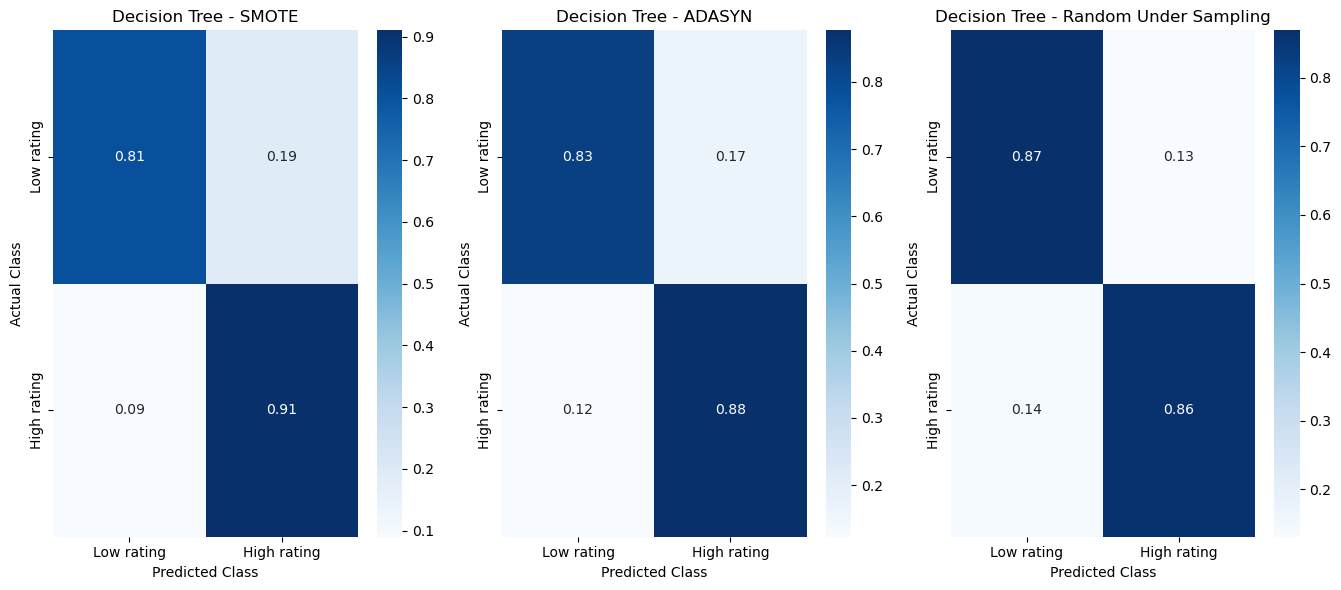


Classification Report for Random Forest (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.79      0.84      0.81     12160
 High rating       0.94      0.92      0.93     35674

    accuracy                           0.90     47834
   macro avg       0.87      0.88      0.87     47834
weighted avg       0.90      0.90      0.90     47834


Classification Report for Random Forest (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.73      0.87      0.79     12160
 High rating       0.95      0.89      0.92     35674

    accuracy                           0.88     47834
   macro avg       0.84      0.88      0.85     47834
weighted avg       0.89      0.88      0.89     47834


Classification Report for Random Forest (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.73      0.90      0.80     12160
 High rating       0.96      0.88      0.92     35674



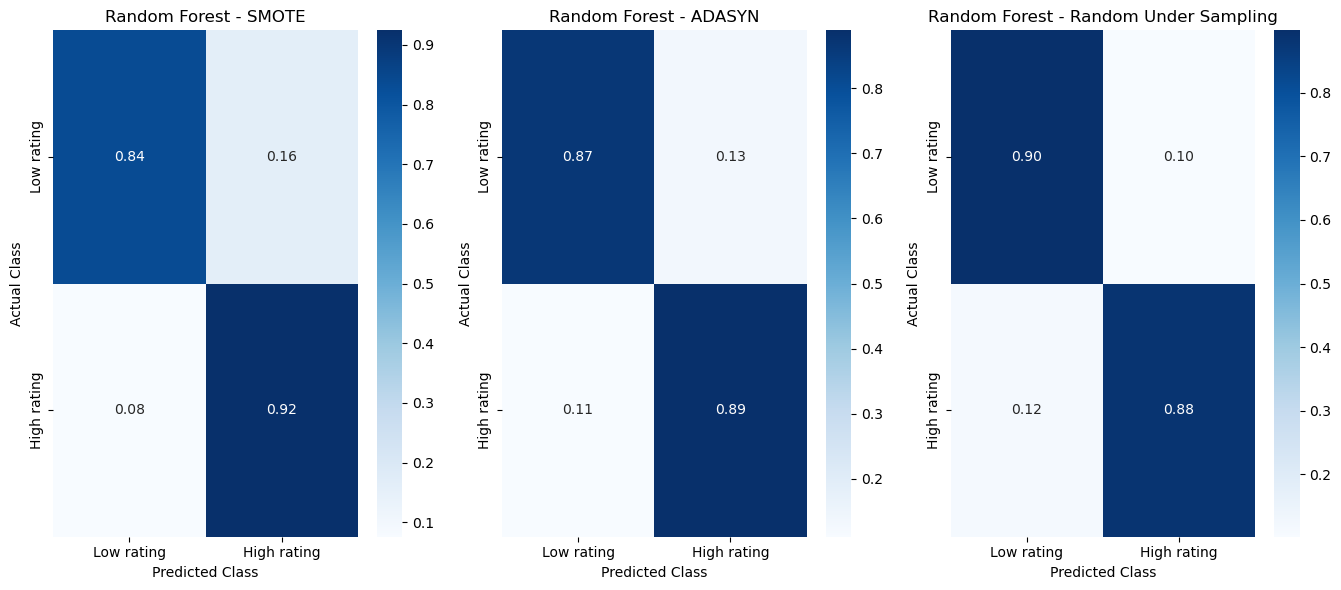


Classification Report for Naive Bayes (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.74      0.82      0.78     12160
 High rating       0.94      0.90      0.92     35674

    accuracy                           0.88     47834
   macro avg       0.84      0.86      0.85     47834
weighted avg       0.89      0.88      0.88     47834


Classification Report for Naive Bayes (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.69      0.85      0.76     12160
 High rating       0.95      0.87      0.91     35674

    accuracy                           0.87     47834
   macro avg       0.82      0.86      0.84     47834
weighted avg       0.88      0.87      0.87     47834


Classification Report for Naive Bayes (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.74      0.82      0.78     12160
 High rating       0.93      0.90      0.92     35674

    ac

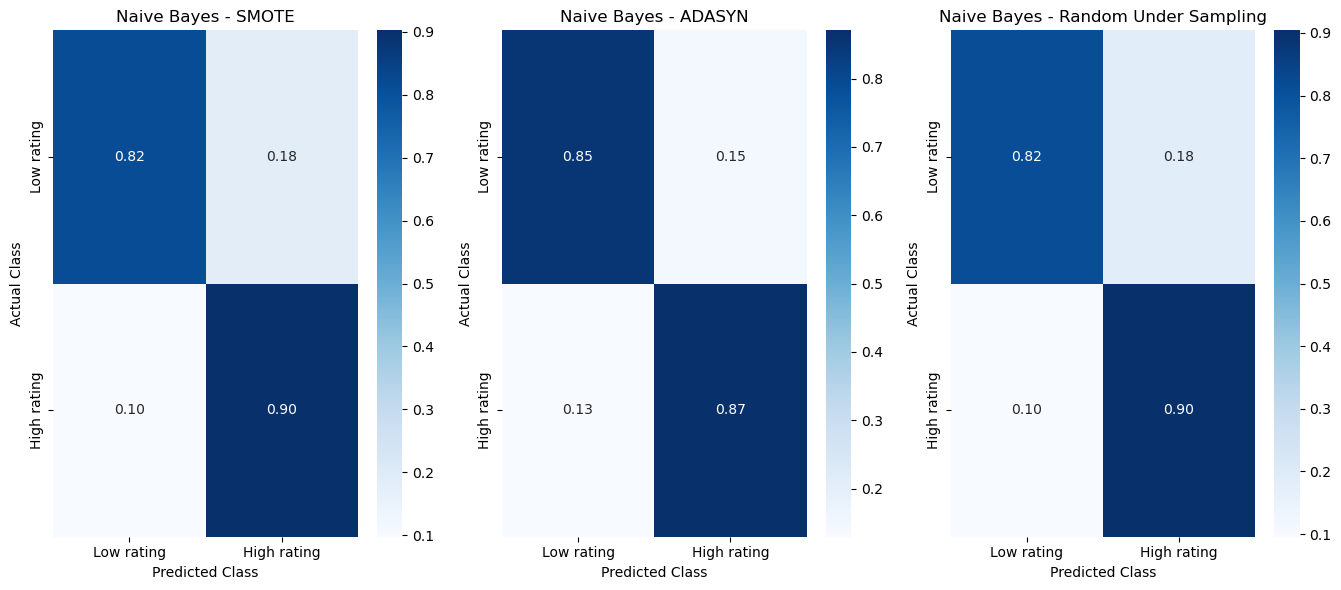

/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for Bagging (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.77      0.84      0.80     12160
 High rating       0.94      0.92      0.93     35674

    accuracy                           0.90     47834
   macro avg       0.86      0.88      0.87     47834
weighted avg       0.90      0.90      0.90     47834



/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for Bagging (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.71      0.86      0.78     12160
 High rating       0.95      0.88      0.91     35674

    accuracy                           0.88     47834
   macro avg       0.83      0.87      0.85     47834
weighted avg       0.89      0.88      0.88     47834



/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for Bagging (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.71      0.89      0.79     12160
 High rating       0.96      0.87      0.91     35674

    accuracy                           0.88     47834
   macro avg       0.83      0.88      0.85     47834
weighted avg       0.89      0.88      0.88     47834



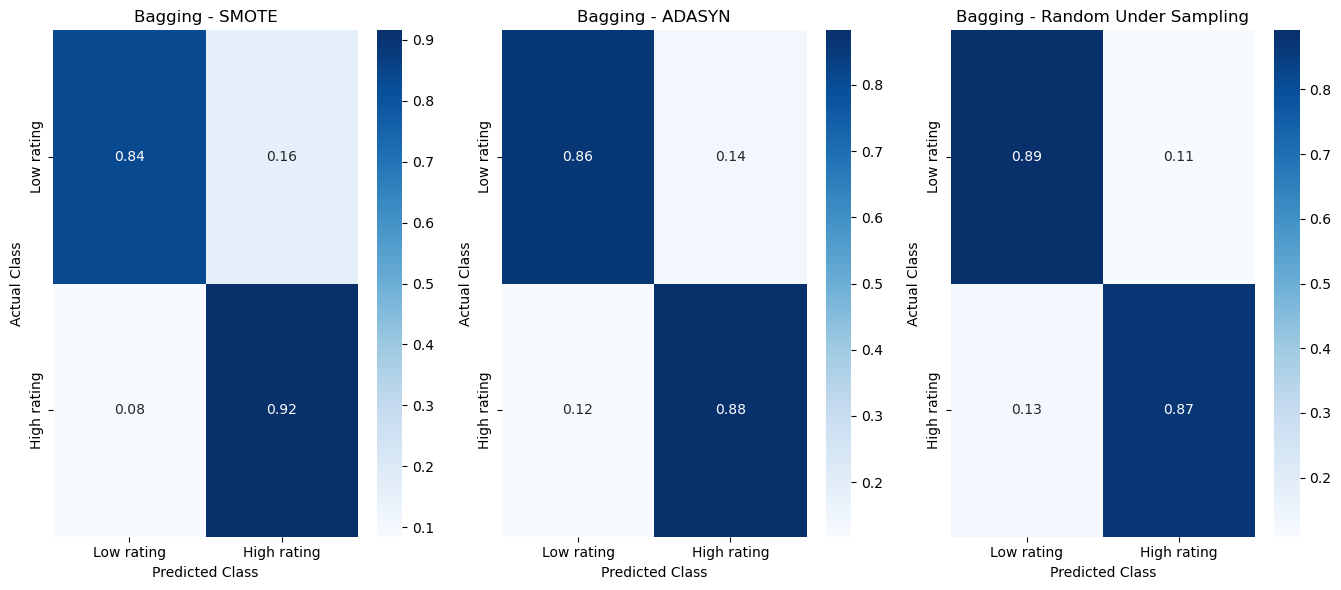

/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for AdaBoost (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.77      0.82      0.80     12160
 High rating       0.94      0.92      0.93     35674

    accuracy                           0.89     47834
   macro avg       0.86      0.87      0.86     47834
weighted avg       0.90      0.89      0.89     47834



/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for AdaBoost (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.71      0.84      0.77     12160
 High rating       0.94      0.88      0.91     35674

    accuracy                           0.87     47834
   macro avg       0.83      0.86      0.84     47834
weighted avg       0.88      0.87      0.87     47834



/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classification Report for AdaBoost (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.71      0.87      0.78     12160
 High rating       0.95      0.88      0.91     35674

    accuracy                           0.88     47834
   macro avg       0.83      0.87      0.85     47834
weighted avg       0.89      0.88      0.88     47834



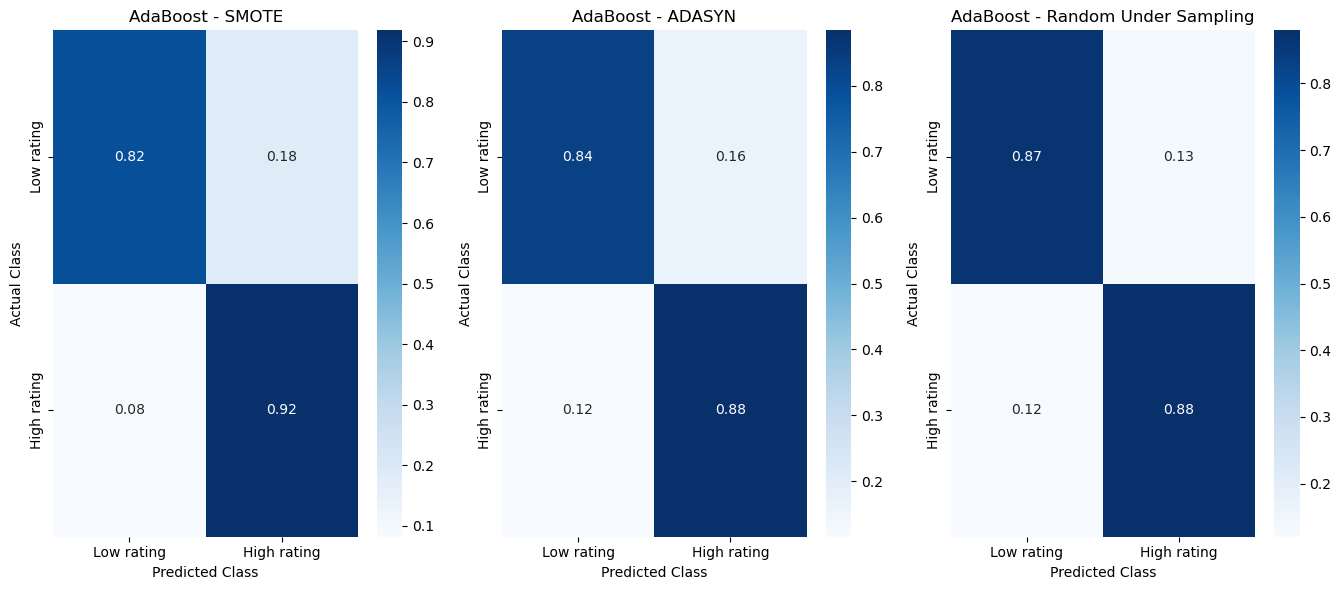

/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa


Classification Report for XGBoost (SMOTE Data):
              precision    recall  f1-score   support

  Low rating       0.81      0.84      0.83     12160
 High rating       0.95      0.93      0.94     35674

    accuracy                           0.91     47834
   macro avg       0.88      0.89      0.88     47834
weighted avg       0.91      0.91      0.91     47834



/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa


Classification Report for XGBoost (ADASYN Data):
              precision    recall  f1-score   support

  Low rating       0.72      0.89      0.80     12160
 High rating       0.96      0.88      0.92     35674

    accuracy                           0.88     47834
   macro avg       0.84      0.89      0.86     47834
weighted avg       0.90      0.88      0.89     47834



/opt/software/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: Fut


Classification Report for XGBoost (Random Under Sampling Data):
              precision    recall  f1-score   support

  Low rating       0.75      0.90      0.82     12160
 High rating       0.96      0.90      0.93     35674

    accuracy                           0.90     47834
   macro avg       0.85      0.90      0.87     47834
weighted avg       0.91      0.90      0.90     47834



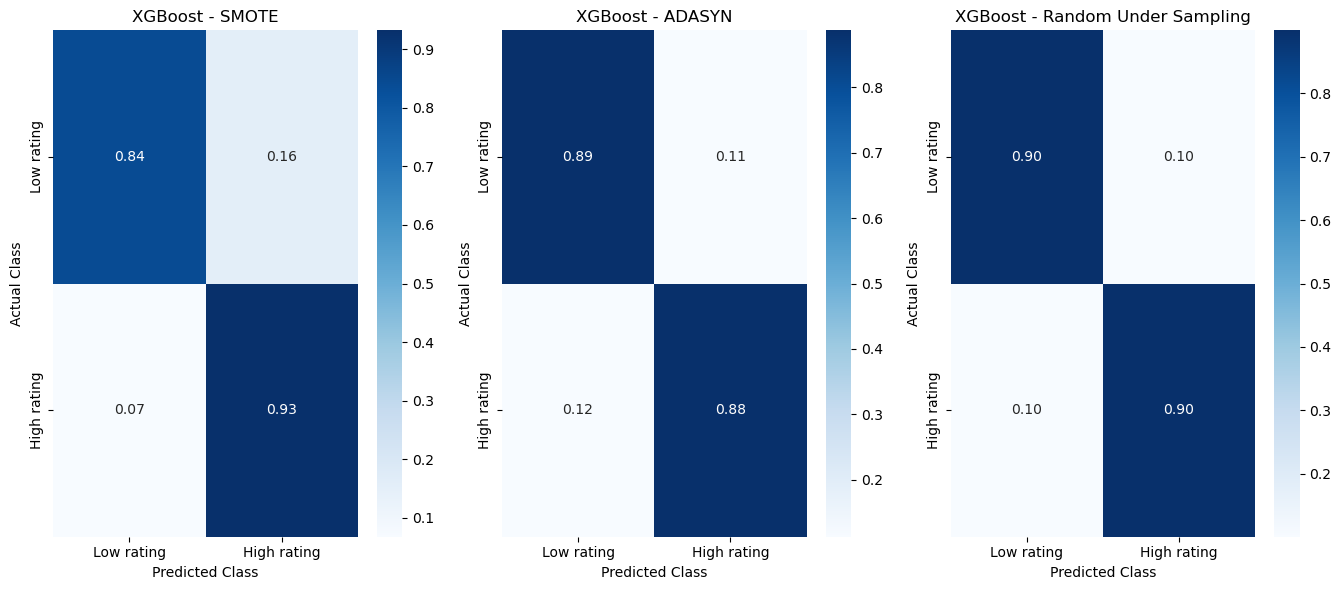

In [21]:
def plot_roc_curves(models, X_test, y_test, resampling_methods):
    """
    Plot ROC curves for different models and data balancing techniques.

    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_test (array-like): Feature matrix for testing.
    - y_test (array-like): True labels for testing.
    - resampling_methods (dict): Dictionary of resampling methods to apply.
    """
    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        for resample_name, resampler in resampling_methods.items():
            # Resample the training data
            X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            
            # Train the model
            model.fit(X_train_resampled, y_train_resampled)
            y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates

            # Compute ROC curve and AUC score
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)

            # Plot ROC curve
            plt.plot(fpr, tpr, label=f'{model_name} ({resample_name}) AUC = {roc_auc:.2f}')

    # Plot ROC diagonal
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Negative Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Various Models and Resampling Methods')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

def plot_confusion_matrices(models, X_test, y_test, X_train, y_train, resampling_methods):
    """
    Plot confusion matrices and print classification reports for different models and data balancing techniques.

    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_test (array-like): Feature matrix for testing.
    - y_test (array-like): True labels for testing.
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - resampling_methods (dict): Dictionary of resampling methods to apply.
    """
    balance_types = ['Unbalanced', 'SMOTE', 'ADASYN', 'Random Under Sampling']
    
    for model_name, model in models.items():
        plt.figure(figsize=(18, 6))
        
        # Plot confusion matrices for each data handling method
        for i, (balance_type, resampler) in enumerate(resampling_methods.items()):
            if balance_type == 'Unbalanced':
                X_train_data, y_train_data = X_train, y_train
            else:
                X_train_data, y_train_data = resampler.fit_resample(X_train, y_train)
            
            # Train and predict
            model.fit(X_train_data, y_train_data)
            y_pred = model.predict(X_test)
            
            # Compute confusion matrix and normalize it to show as percentages
            cm = confusion_matrix(y_test, y_pred, normalize='true')
            
            # Print classification report
            report = classification_report(y_test, y_pred, target_names=["Low rating", "High rating"])
            print(f"\nClassification Report for {model_name} ({balance_type} Data):\n{report}")
            
            # Plot confusion matrix as percentages
            ax = plt.subplot(1, len(balance_types), i + 1)
            sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=["Low rating", "High rating"], yticklabels=["Low rating", "High rating"])
            ax.set_title(f'{model_name} - {balance_type}')
            ax.set_xlabel("Predicted Class")
            ax.set_ylabel("Actual Class")

        plt.tight_layout()
        plt.show()

# Resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Under Sampling': RandomUnderSampler(random_state=1234)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(random_state=1234)
}


# Plot ROC curves
plot_roc_curves(models, X_test, y_test, resampling_methods)

# Plot confusion matrices
plot_confusion_matrices(models, X_test, y_test, X_train, y_train, resampling_methods)


/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/software/lib/python3.10/site-p

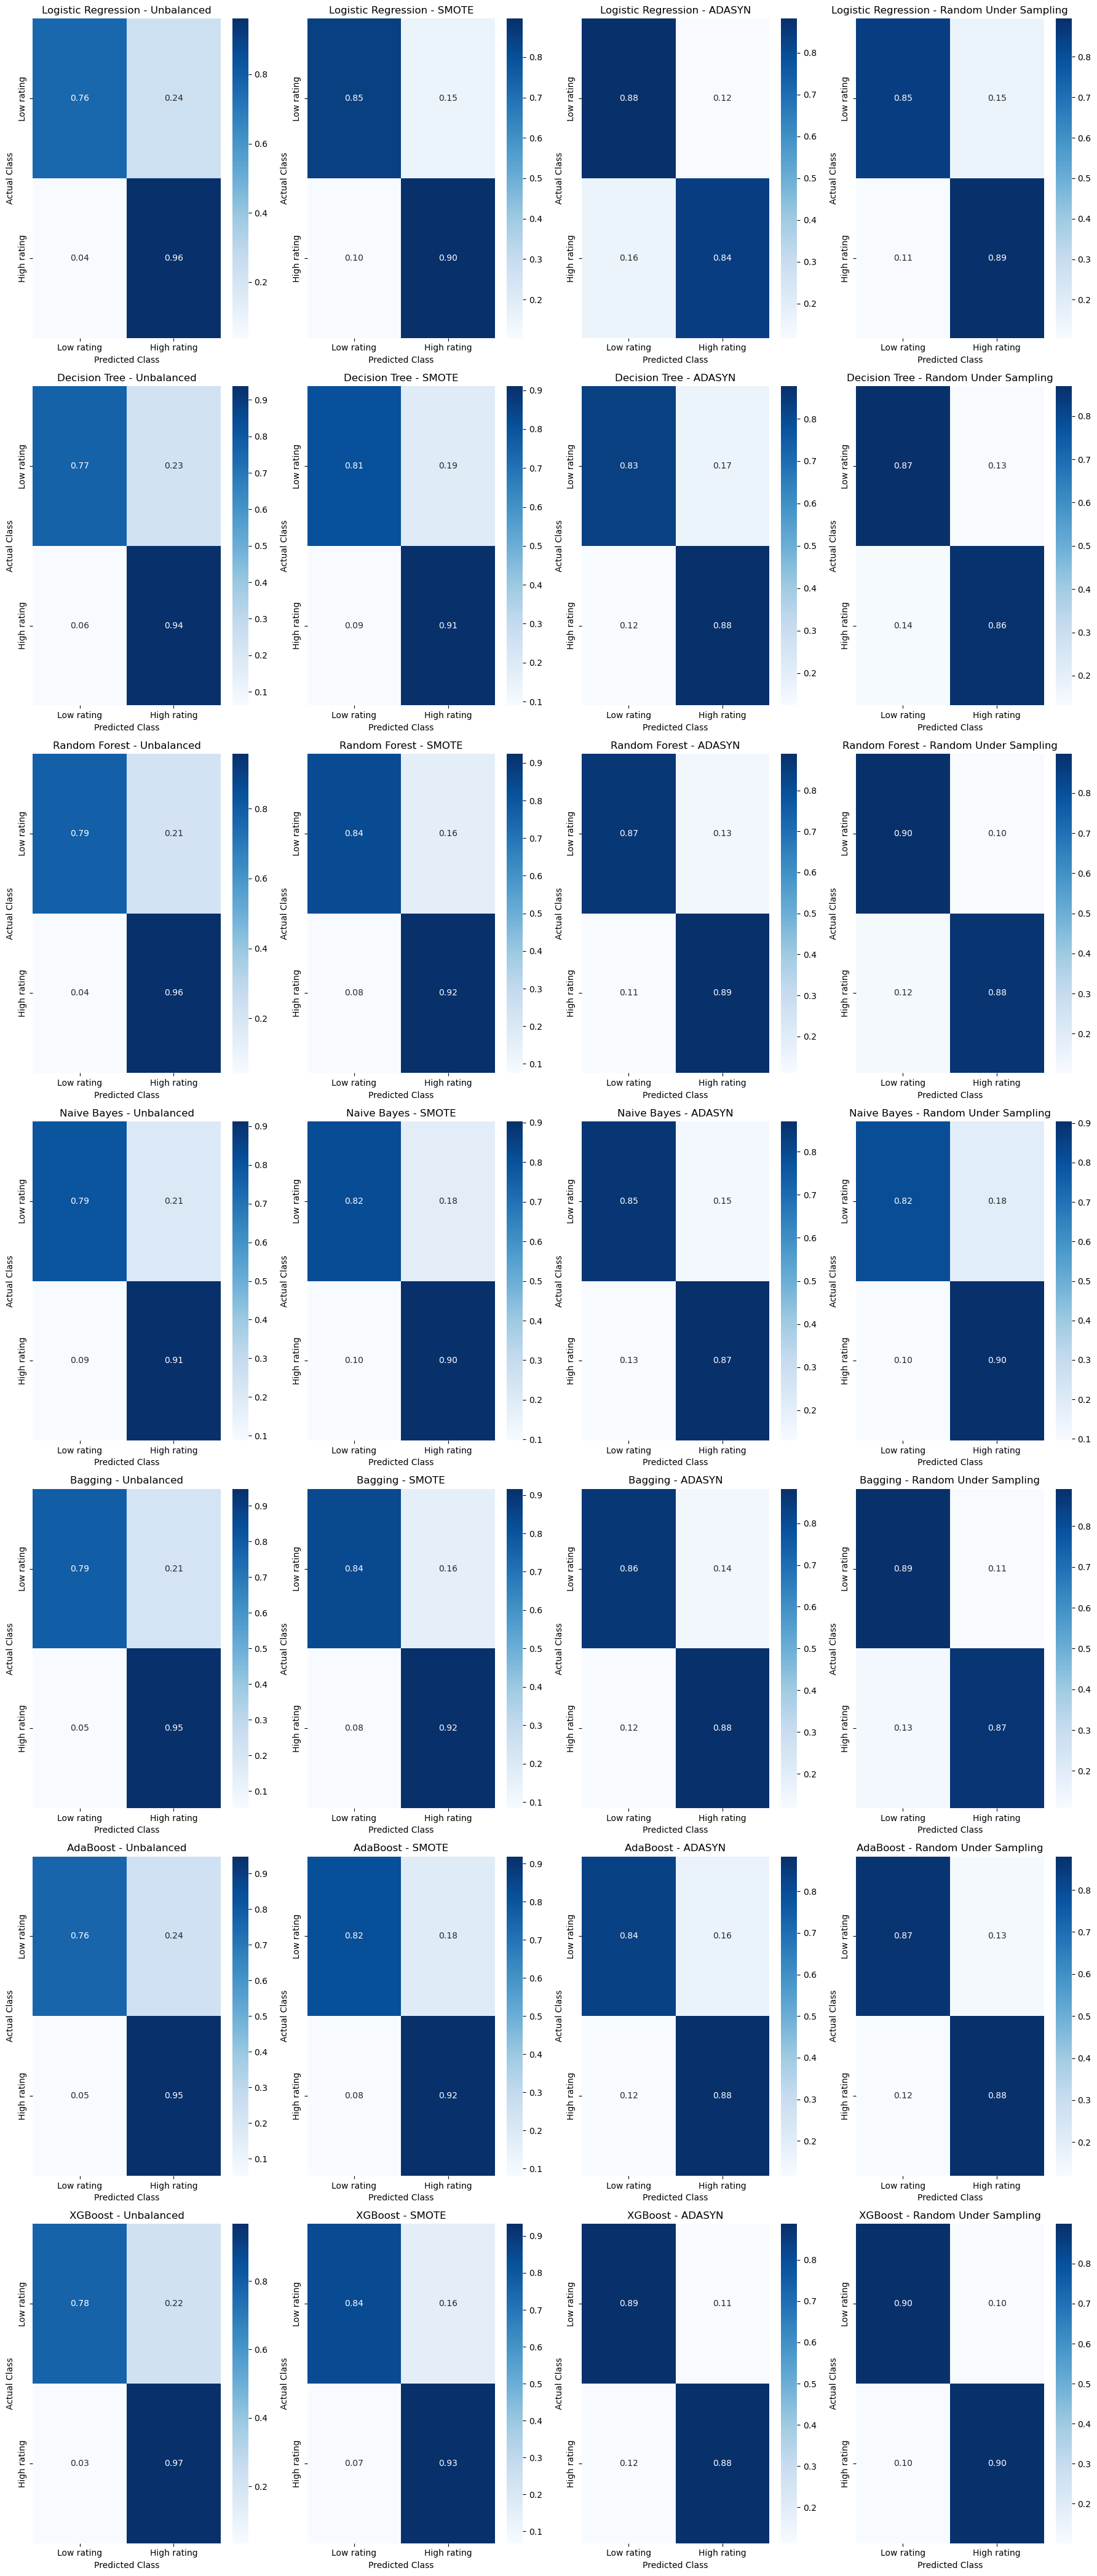

In [22]:
def plot_confusion_matrices(models, X_test, y_test, X_train, y_train, resampling_methods):
    """
    Plot confusion matrices for different models using various resampling methods.

    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_test (array-like): Feature matrix for testing.
    - y_test (array-like): True labels for testing.
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - resampling_methods (dict): Dictionary of resampling methods to apply.
    """
    # Create a figure for the confusion matrices
    num_models = len(models)
    num_resampling_methods = len(resampling_methods) + 1  # +1 for unbalanced data
    plt.figure(figsize=(18, 6 * num_models))

    for i, (model_name, model) in enumerate(models.items()):
        # Unbalanced dataset confusion matrix
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm_unbalanced = confusion_matrix(y_test, y_pred, normalize='true')
        
        # Plot confusion matrix for unbalanced data
        ax = plt.subplot(num_models, num_resampling_methods, i * num_resampling_methods + 1)
        sns.heatmap(cm_unbalanced, annot=True, fmt=".2f", cmap='Blues', xticklabels=["Low rating", "High rating"], yticklabels=["Low rating", "High rating"])
        ax.set_title(f'{model_name} - Unbalanced')
        ax.set_xlabel("Predicted Class")
        ax.set_ylabel("Actual Class")
        
        # Loop through resampling methods
        for j, (resample_name, resampler) in enumerate(resampling_methods.items()):
            # Resample the training data
            X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            
            # Train the model on the resampled data
            model.fit(X_train_resampled, y_train_resampled)
            y_pred = model.predict(X_test)
            cm_resampled = confusion_matrix(y_test, y_pred, normalize='true')
            
            # Plot confusion matrix for resampled data
            ax = plt.subplot(num_models, num_resampling_methods, i * num_resampling_methods + (j + 2))
            sns.heatmap(cm_resampled, annot=True, fmt=".2f", cmap='Blues', xticklabels=["Low rating", "High rating"], yticklabels=["Low rating", "High rating"])
            ax.set_title(f'{model_name} - {resample_name}')
            ax.set_xlabel("Predicted Class")
            ax.set_ylabel("Actual Class")

    plt.tight_layout()
    plt.show()

# Resampling methods
resampling_methods = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'Random Under Sampling': RandomUnderSampler(random_state=1234)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(random_state=1234)
}

# Plot confusion matrices for unbalanced and resampled datasets
plot_confusion_matrices(models, X_test, y_test, X_train, y_train, resampling_methods)

# Hyperparamter tuning:

After feature selection, we use these features for Random Forest:

## a. Random Search

In [ ]:
# 1. Train default Random Forest model
default_rf = RandomForestClassifier(random_state=42)
default_rf.fit(X_train, y_train)
y_pred_default = default_rf.predict(X_test)

# 2. Train Random Forest model with Randomized Search for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splits
}

# Initialize RandomizedSearchCV
clf_rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
clf_rs.fit(X_train, y_train)
y_pred_optimized = clf_rs.best_estimator_.predict(X_test)

# 3. Create confusion matrices
cm_default = confusion_matrix(y_test, y_pred_default)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for default parameters
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=default_rf.classes_)
disp_default.plot(ax=axes[0], cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix - Default Hyperparameters')

# Plot for optimized parameters
disp_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=clf_rs.best_estimator_.classes_)
disp_optimized.plot(ax=axes[1], cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Confusion Matrix - Optimized Hyperparameters')

# Show the plot
plt.tight_layout()
plt.show()

# Print the best parameters
print("Best Hyperparameters from Randomized Search: ", clf_rs.best_params_)

/opt/software/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


## b. Bayesian Search

In [ ]:
pip install scikit-optimize

In [ ]:
# Train Random Forest model with Bayesian Search for hyperparameter tuning
param_space = {
    'n_estimators': (100, 1000),  # Number of trees
    'max_depth': (5, 50),  # Maximum depth of each tree
    'min_samples_split': (2, 20),  # Minimum number of samples required to split
    'min_samples_leaf': (1, 10),  # Minimum number of samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for splits
}

# Initialize the Bayesian search
opt = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=param_space,
    n_iter=50,  # Number of iterations to search
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model on your training data
opt.fit(X_train, y_train)
y_pred_optimized = opt.best_estimator_.predict(X_test)

# 3. Create confusion matrices
cm_default = confusion_matrix(y_test, y_pred_default)
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for default parameters
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=default_rf.classes_)
disp_default.plot(ax=axes[0], cmap=plt.cm.Blues, ax=axes[0])
axes[0].set_title('Confusion Matrix - Default Hyperparameters')

# Plot for optimized parameters
disp_optimized = ConfusionMatrixDisplay(confusion_matrix=cm_optimized, display_labels=opt.best_estimator_.classes_)
disp_optimized.plot(ax=axes[1], cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title('Confusion Matrix - Optimized Hyperparameters')

# Show the plot
plt.tight_layout()
plt.show()

# Print the best parameters
print("Best Hyperparameters from Bayesian Search: ", opt.best_params_)

In [ ]:
from skopt.plots import plot_convergence

# Plot the convergence of the Bayesian optimization process
plot_convergence(opt)